# MONTHLY ELECTRICITY STATISTICS

Este proyecto busca ofrecer un panorama claro sobre cómo los países seleccionados han
avanzado en la producción de energía, favoreciendo la comparación de los diferentes
tipos de fuentes energéticas y brindando insights que podrían ser útiles para la
formulación de políticas energéticas sostenibles en el futuro.

## OBJETIVO
### Objetivo general:

El estudio está específicamente enfocado en seis países de habla hispana: Colombia,
México, Chile, España, Argentina y Costa Rica, durante el período comprendido entre 2010
y 2022. El objetivo es analizar cuáles son los países de habla hispana que han tenido
mayor progreso en la producción de los diferentes tipos de energía durante ese período,
basándose en el dataset recopilado en Kaggle sobre la producción de energía mensual

### Objetivos específicos

1. lograr una limpieza eficaz del dataset Monthly Electricity Production con el fin de obtener
unos nuevos datos, libres de filas y columnas que no sean necesarias para el análisis
requerido.<br>
2. Depurar y excluir aquellos datos nulos que se tengan dentro del dataset, con el fin de
poder realizar un análisis descriptivo efectivo para la recopilación de información.<br>
3. Definir e interpretar cuál es el tipo de energía que mayor producción tiene para los países
a analizar

### Cargue Dataset

In [1]:
# importar liberarias

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Formatear flotantes a 2 decimales
pd.options.display.float_format = '{:,.2f}'.format

### Exploración inicial

In [3]:
# Se carga el DataFrame y se muestra la informacion de las columnas
df = pd.read_csv("data.csv")
df.shape

(181915, 12)

## Tratamiento de duplicados

In [4]:
df.drop_duplicates() # permite eliminar las filas o registros duplicados en un dataset

df.shape

(181915, 12)

### Tratamiento de valores nulos

In [5]:
# Eliminar filas que contienen al menos un valor nulo
df_sin_nulos = df.dropna()

df_sin_nulos.shape

(164810, 12)

### Codificar campos relevantes

In [6]:
# Codificamos los países asignando un número a cada uno
df['Codigo_pais'] = df['COUNTRY'].astype('category').cat.codes

In [7]:
## Countries:
paises = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Costa Rica', 'Spain']
df_filtrado = df[df['COUNTRY'].isin(paises)]

## energias:
product = ['Hydro', 'Wind', 'Solar', 'Nuclear']
df_filtrado = df_filtrado[df_filtrado['PRODUCT'].isin(product)]

In [8]:
temp = df_filtrado[df_filtrado['YEAR'] >= 2018]

In [9]:
df_group_pais = temp.groupby(['COUNTRY', 'PRODUCT'])['VALUE'].sum().unstack(fill_value=0)
df_group_pais

PRODUCT,Hydro,Nuclear,Solar,Wind
COUNTRY,,,,
Argentina,"130,979.51","42,281.45","7,313.37","42,503.46"
Chile,"107,329.24",0.00,"43,865.62","30,746.95"
Colombia,"280,557.86",0.00,"1,146.46",241.33
Costa Rica,"18,550.75",0.00,155.60,"2,942.56"
Mexico,"152,359.50","56,897.99","45,467.30","90,503.17"
Spain,"150,003.07","274,838.84","105,529.24","281,017.62"


# Graficos

### Grafico de barras agrupado

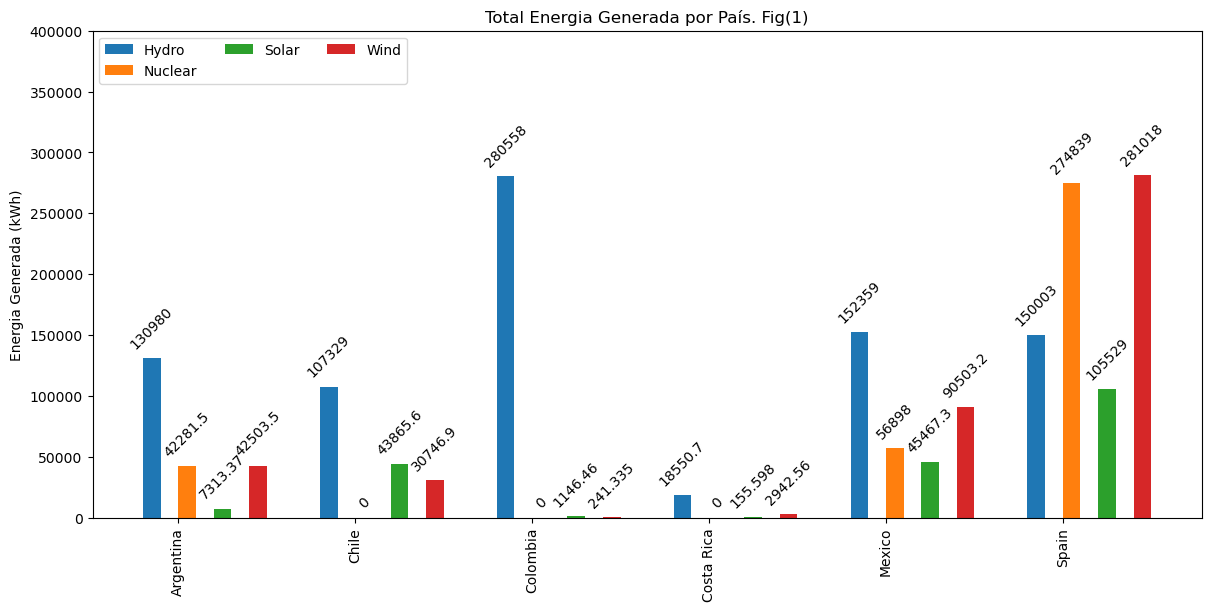

In [10]:
width = 0.1
x = np.arange(len(df_group_pais))
gap = 0.1
fig, ax = plt.subplots(layout='constrained',figsize=(12, 6))

# Inicializamos un offset de posición
multiplier = 0

# Recorrer las columnas del DataFrame
for attribute, measurement in df_group_pais.items():
    offset = (width + gap) * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)  # Barras
    ax.bar_label(rects, padding=5,rotation=45)  # Etiquetas encima de las barras
    multiplier += 1

# etiquetas, título y leyenda
ax.set_ylabel('Energia Generada (kWh)')
ax.set_title('Total Energia Generada por País. Fig(1)')
ax.set_xticks(x + width * (len(df_group_pais.columns) - 1) / 2)
ax.set_xticklabels(df_group_pais.index, rotation=90)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 400000)  # límites del eje Y
plt.show()

El grafico anterior nos muestra que dentro del rango de paises y energias analizadas se encuentran tres valores prominentes siendo la produccion de energia hidroelectrica en Colombia, la produccion de energia nueclear y eolica en España.

Debido a que la energia solar no se muestra como una fuente principal en ninguno de los paises analizados, no se considera necesario analizar este tipo de energia.

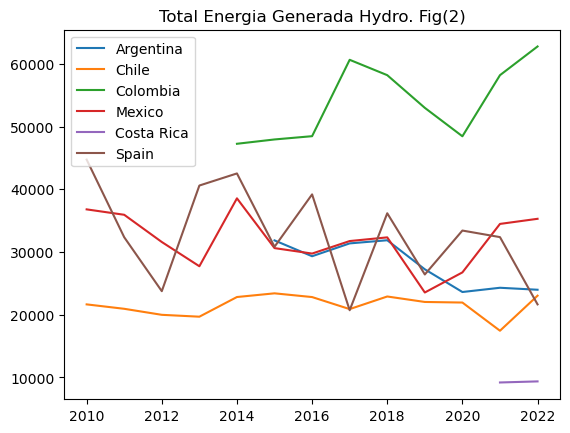

In [11]:
## Countries:
paises = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Costa Rica', 'Spain']
df_filtrado = df[df['COUNTRY'].isin(paises)]

df_group = df_filtrado.groupby(['YEAR','COUNTRY','PRODUCT'])['VALUE'].sum().unstack(fill_value=0).reset_index()
df_final = df_group[['YEAR','COUNTRY','Hydro']]

# Se analiza el comparativo de la energia Hydro en todos los paises

paises = ['Argentina']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Hydro'], label='Argentina')  # Etiqueta para Argentina

paises = ['Chile']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Hydro'], label='Chile')  # Etiqueta para Chile

paises = ['Colombia']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Hydro'], label='Colombia')  # Etiqueta para Colombia

paises = ['Mexico']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Hydro'], label='Mexico')  # Etiqueta para Mexico

paises = ['Costa Rica']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Hydro'], label='Costa Rica')  # Etiqueta para Costa Rica

paises = ['Spain']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Hydro'], label='Spain')  # Etiqueta para Costa Spain

plt.title('Total Energia Generada Hydro. Fig(2)')
plt.legend()
plt.show()

### Grafico de lineas

El analisis nos muestra que a pesa de que en Colombia se empezaron a recopilar los datos en 2014, este pais es el que mas recursos e infraestructura tiene para una producir energia hidroelectrica. Adicionalmente, teniendo en cuenta la caida de produccion en el periodo 2019 a 2020 aun asi se encuentra por encima de la media a comparacion de los demas paises hispanohablantes. 

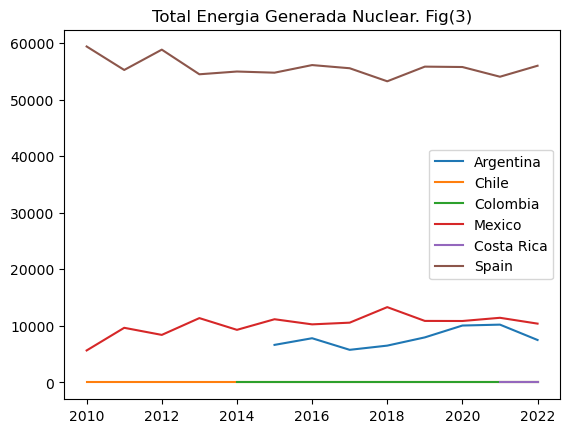

In [12]:
## Countries:
paises = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Costa Rica', 'Spain']
df_filtrado = df[df['COUNTRY'].isin(paises)]

df_group = df_filtrado.groupby(['YEAR','COUNTRY','PRODUCT'])['VALUE'].sum().unstack(fill_value=0).reset_index()
df_final = df_group[['YEAR','COUNTRY','Nuclear']]

# Se analiza el comparativo de la energia Nuclear en todos los paises

paises = ['Argentina']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Nuclear'], label='Argentina')  # Etiqueta para Argentina

paises = ['Chile']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Nuclear'], label='Chile')  # Etiqueta para Chile

paises = ['Colombia']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Nuclear'], label='Colombia')  # Etiqueta para Colombia

paises = ['Mexico']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Nuclear'], label='Mexico')  # Etiqueta para Mexico

paises = ['Costa Rica']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Nuclear'], label='Costa Rica')  # Etiqueta para Costa Rica

paises = ['Spain']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Nuclear'], label='Spain')  # Etiqueta para Costa Spain

plt.legend()
plt.title('Total Energia Generada Nuclear. Fig(3)')
plt.show()

En el grafico anterior se evidencia la produccion estable de España, donde no se presentan picos o caidas muy abruptos, mientras que en paises como Colombia, Chile o Costa Rica la produccion de energia nuclear es totalmente nula. 

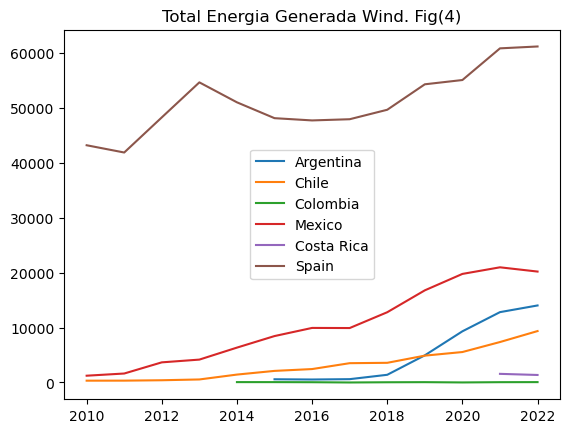

In [13]:
## Countries:
paises = ['Argentina', 'Chile', 'Colombia', 'Mexico', 'Costa Rica', 'Spain']
df_filtrado = df[df['COUNTRY'].isin(paises)]

df_group = df_filtrado.groupby(['YEAR','COUNTRY','PRODUCT'])['VALUE'].sum().unstack(fill_value=0).reset_index()
df_final = df_group[['YEAR','COUNTRY','Wind']]

# Se analiza el comparativo de la energia Nuclear en todos los paises

paises = ['Argentina']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Wind'], label='Argentina')  # Etiqueta para Argentina

paises = ['Chile']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Wind'], label='Chile')  # Etiqueta para Chile

paises = ['Colombia']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Wind'], label='Colombia')  # Etiqueta para Colombia

paises = ['Mexico']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Wind'], label='Mexico')  # Etiqueta para Mexico

paises = ['Costa Rica']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Wind'], label='Costa Rica')  # Etiqueta para Costa Rica

paises = ['Spain']
temp = df_final[df_final['COUNTRY'].isin(paises)]
plt.plot(temp['YEAR'], temp['Wind'], label='Spain')  # Etiqueta para Costa Spain

plt.legend()
plt.title('Total Energia Generada Wind. Fig(4)')
plt.show()

En el grafico anterior se evidencia una subida general en la produccion de energia eolica, donde paises como España, Chile, Mexico y Agentina cuentan con una  produccion creciente de esta energia con el paso del tiempo, siendo España el lider en la produccion general a nivel hispano.   